<a href="https://colab.research.google.com/github/rawatpranjal/AlgorithmicCollusion/blob/main/CournotDuopoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cournot Duopoly**

- single state which is what quantity the opponent produced last period

In [29]:
# parameters of game
u = 40
v = 1
w = 4
n = 2

In [35]:
def price(Q,u,v):
    return u-v*Q

def profit(P,Q):
    return

class cournot:
    def __init__(self,u,v,w,n):
        self.u=u
        self.v=v
        self.w=w
        self.n=n
        self.Qw=(u-w)/v
        self.Qc=n*(u-w)/v/(n+1)
        self.Qm=(u-w)/2*v
        self.Pw = price(self.Qw,u,v)
        self.Pc = price(self.Qc,u,v)
        self.Pm = price(self.Qm,u,v)
        self.Πw = 0
        self.Πc = (self.Pc-w)*self.Qc
        self.Πm = (self.Pm-w)*self.Qm
        self.qw = self.Qw/n
        self.qc = self.Qc/n
        self.qm = self.Qm/n
        self.πw = 0
        self.πc = self.Πc/n
        self.πm = self.Πm/n
    
    def price(self,q,q_):
        return self.u-v*(q+q_)
    
    def profit(self,q,q_):
        return (self.price(q,q_)-w)*q
        
game = cournot(40,1,4,2)

In [36]:
# initialize the reward matrix
num_states = 10
num_actions = 10 #0 producing highest quantity
action2quantity = np.linspace(cournot(u,v,w,n).qm,cournot(u,v,w,n).qw,num_actions)

import numpy as np
reward = np.zeros((num_actions, num_actions))
for i in range(reward.shape[0]):
    for j in range(reward.shape[1]):
        reward[i, j] += game.profit(action2quantity[i],action2quantity[j])
print(reward)


[[162. 153. 144. 135. 126. 117. 108.  99.  90.  81.]
 [170. 160. 150. 140. 130. 120. 110. 100.  90.  80.]
 [176. 165. 154. 143. 132. 121. 110.  99.  88.  77.]
 [180. 168. 156. 144. 132. 120. 108.  96.  84.  72.]
 [182. 169. 156. 143. 130. 117. 104.  91.  78.  65.]
 [182. 168. 154. 140. 126. 112.  98.  84.  70.  56.]
 [180. 165. 150. 135. 120. 105.  90.  75.  60.  45.]
 [176. 160. 144. 128. 112.  96.  80.  64.  48.  32.]
 [170. 153. 136. 119. 102.  85.  68.  51.  34.  17.]
 [162. 144. 126. 108.  90.  72.  54.  36.  18.   0.]]


In [37]:
import random
import numpy as np

# initialize parameters
gamma = 0.9
alpha = 0.1
initial_temperature = 10.0
temperature_decay = 0.9999
min_temperature = 0.0001
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.9999
min_eps = 0.0001
eps = initial_eps

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
Q1 = np.ones((num_states, num_actions))
Q2 = np.ones((num_states, num_actions))
agent1_history = []
agent2_history = []

In [38]:
# run Boltzmann Q-learning for a fixed number of episodes
# initialize the state
state1 = 1
state2 = 1
num_episodes = 100000
for episode in range(num_episodes):

    # take the exploratory action
    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    # collect rewards
    reward1 = reward[action1,action2]
    reward2 = reward[action2,action1]

    # observe the next state
    next_state1 = action2
    next_state2 = action1

    # update the Q-value for the selected action in the current state
    Q1[state1][action1] =  (1-alpha)*Q1[state1][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1]))
    Q2[state2][action2] =  (1-alpha)*Q2[state2][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2]))

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)

    if episode%10000==0:
      print('\n',episode, temperature, eps)
      print(np.mean([boltzmann_action_selection(Q1, 1,temperature) for i in range(100)]), np.mean([boltzmann_action_selection(Q2, 1,temperature) for i in range(100)]))
      print(np.mean([boltzmann_action_selection(Q1, 0,temperature) for i in range(100)]), np.mean([boltzmann_action_selection(Q2, 0,temperature) for i in range(100)]))
    
    agent1_history.append(action1)
    agent2_history.append(action2)


 0 9.999 0.9999
4.91 4.93
4.31 4.64

 10000 3.6782426032832705 0.3678242603283259
7.0 5.0
3.0 1.0

 20000 1.3530821730781113 0.13530821730781062
3.0 5.0
3.0 1.0

 30000 0.497746224098313 0.049774622409830716
3.0 2.0
4.0 1.0

 40000 0.1831014468548652 0.01831014468548625
0.0 5.0
4.0 1.0

 50000 0.06735588984342127 0.006735588984342076
0.0 1.0
4.0 1.0

 60000 0.024777608121224735 0.002477760812122453
0.0 1.0
4.0 1.0

 70000 0.009114716851579779 0.0009114716851579683
1.0 1.0
4.0 1.0

 80000 0.003352949278962375 0.0003352949278962337
1.0 1.0
4.0 1.0

 90000 0.0012334194303957732 0.00012334194303957526
1.0 1.0
4.0 1.0


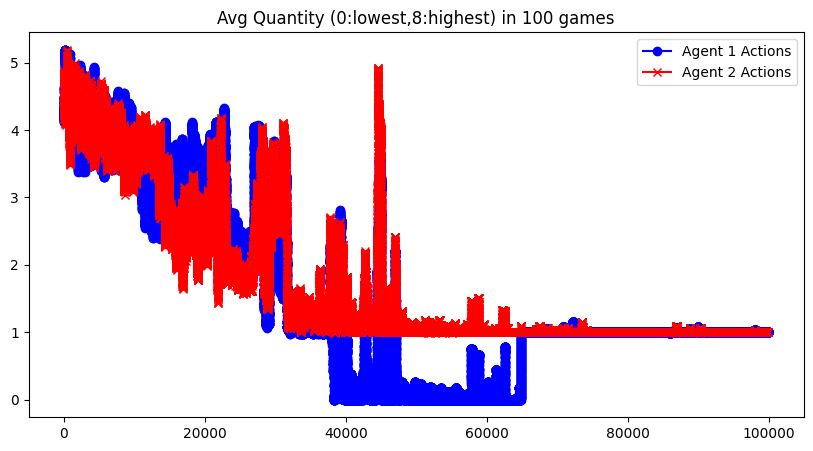

In [40]:
  import matplotlib.pyplot as plt
  plt.rcParams["figure.figsize"] = (10, 5)
  plt.rcParams['font.size']=10
  def moving_average(x, w):
        return np.convolve(x, np.ones(w), 'valid') / w
  plt.plot(moving_average(np.array(agent1_history),100), label = 'Agent 1 Actions', marker = 'o', c = 'b')
  plt.plot(moving_average(np.array(agent2_history),100), label = 'Agent 2 Actions', marker = 'x', c = 'r')
  plt.title('Avg Quantity (0:lowest,8:highest) in 100 games') 
  plt.legend()
  plt.show()

In [42]:
action2quantity[1]

10.0